In [16]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import pandas_profiling

import seaborn as sns
sns.set()


import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../../data/Sales_Multiseries_training.csv")
data.columns

Index(['Store', 'Date', 'Sales', 'Store_Size', 'Num_Employees', 'Returns_Pct',
       'Num_Customers', 'Pct_On_Sale', 'Marketing', 'Near_Xmas',
       'Near_BlackFriday', 'Holiday', 'DestinationEvent', 'Pct_Promotional',
       'Econ_ChangeGDP', 'EconJobsChange', 'AnnualizedCPI'],
      dtype='object')

__Where are the stores? How distant are they__

In [4]:
data.head()

,Store,Date,Sales,Store_Size,Num_Employees,Returns_Pct,Num_Customers,Pct_On_Sale,Marketing,Near_Xmas,Near_BlackFriday,Holiday,DestinationEvent,Pct_Promotional,Econ_ChangeGDP,EconJobsChange,AnnualizedCPI
0,Louisville,07/01/12,76819.40,20100,42,1.03,327,9.96,July In Store Credit Card Signup Discount; In ...,0,0,No,No,0.000047,0.5,NaN,0.02
1,Louisville,07/02/12,78963.86,20100,21,0.41,293,8.65,July In Store Credit Card Signup Discount; In ...,0,0,No,No,0.000047,NaN,NaN,NaN
2,Louisville,07/03/12,74824.71,20100,26,0.31,356,8.96,July In Store Credit Card Signup Discount; In ...,0,0,No,No,0.000047,NaN,NaN,NaN
3,Louisville,07/04/12,78523.92,20100,33,0.83,350,10.08,July In Store Credit Card Signup Discount; In ...,0,0,Yes,No,0.000047,NaN,NaN,NaN
4,Louisville,07/05/12,76445.90,20100,38,0.51,299,9.80,July In Store Credit Card Signup Discount; ID5...,0,0,No,No,0.000047,NaN,NaN,NaN


__What are the number of purchases at these stores__

In [6]:
data.groupby(['Store']).size().reset_index(name='counts')

,Store,counts
0,Baltimore,714
1,Columbus,714
2,Detroit,714
3,Lancaster,714
4,Louisville,714
5,Philadelphia,714
6,Portland,714
7,Richmond,714
8,San Antonio,714
9,Savannah,714


__714 sales in all the 10 stores = 7140__

In [7]:
# lets bring in the the week when the sale happened
data["date_"] = pd.to_datetime(arg=data.Date)
data["week"] = data['date_'].dt.week

In [67]:
locations_week_grouping = data.groupby(['Store','week'])['Sales'].sum().reset_index(name="count")

__In which month are sales the most happening in these locations__

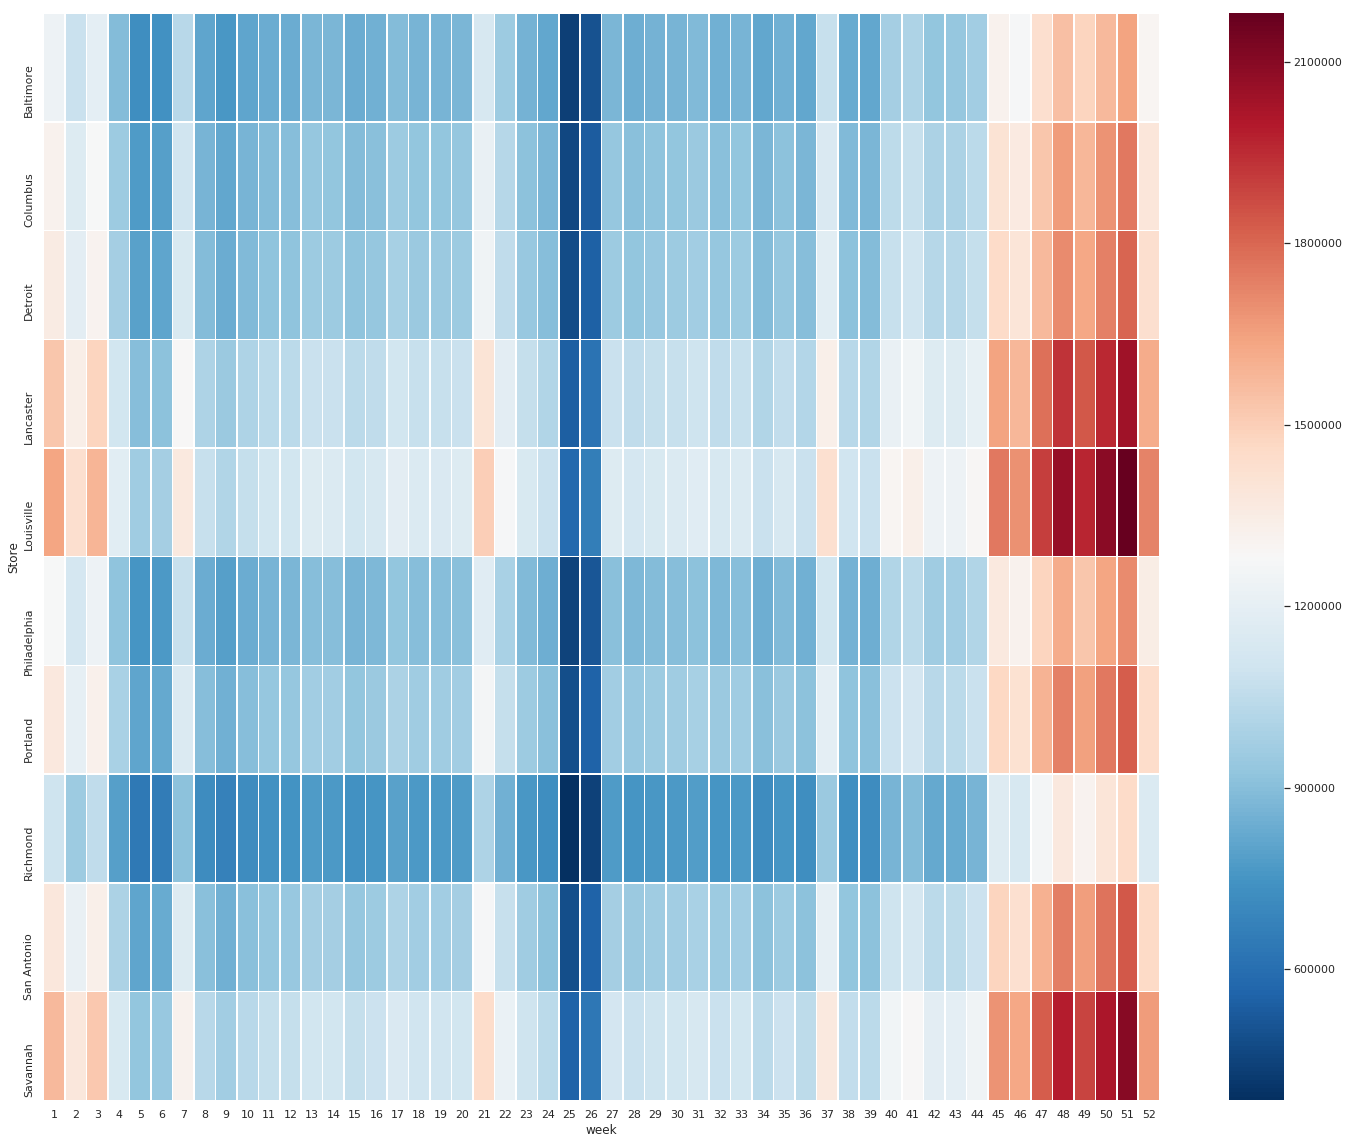

In [68]:
data_pivoted = locations_week_grouping.pivot("Store",
                                             "week",
                                             "count")
fig, ax = plt.subplots(nrows=1, ncols=1)
sns.set(rc={'figure.figsize':(25,20)})
ax = sns.heatmap(data_pivoted, linewidths=.5, cmap = "RdBu_r")

plt.show()

__Clearly, we have most of our sales around the end of year. Least of the sales around the weeks 25, 26(June 18,June 24__

__Store with most sales: Savannah, Louisville, Lanscaster__

In [69]:
fig.savefig('foo.png')

__Is the allocation of number of employees good during different periods (weekly average number of employees)?__

In [70]:
weekly_grouped_avgemployees = data.groupby(['Store','week'])['Num_Employees'].mean().reset_index(name="avg_num_employes")

In [82]:
weekly_grouped_avgemployees[weekly_grouped_avgemployees.Store == "Lancaster"].count()

Store               52
week                52
avg_num_employes    52
dtype: int64

In [83]:
emp_savannah = weekly_grouped_avgemployees[weekly_grouped_avgemployees.Store == 'Savannah']
emp_louisville = weekly_grouped_avgemployees[weekly_grouped_avgemployees.Store == 'Louisville']
emp_lancaster = weekly_grouped_avgemployees[weekly_grouped_avgemployees.Store == 'Lancaster']

sales_savannah = locations_week_grouping[locations_week_grouping.Store == 'Savannah']
sales_louisville = locations_week_grouping[locations_week_grouping.Store == 'Louisville']
sales_lancaster = locations_week_grouping[locations_week_grouping.Store == 'Lancaster']

In [84]:
emp_lancaster.count()

Store               52
week                52
avg_num_employes    52
dtype: int64

<BarContainer object of 52 artists>

Text(0.5, 1.0, 'Weekly change in number of employees with change in Sales')

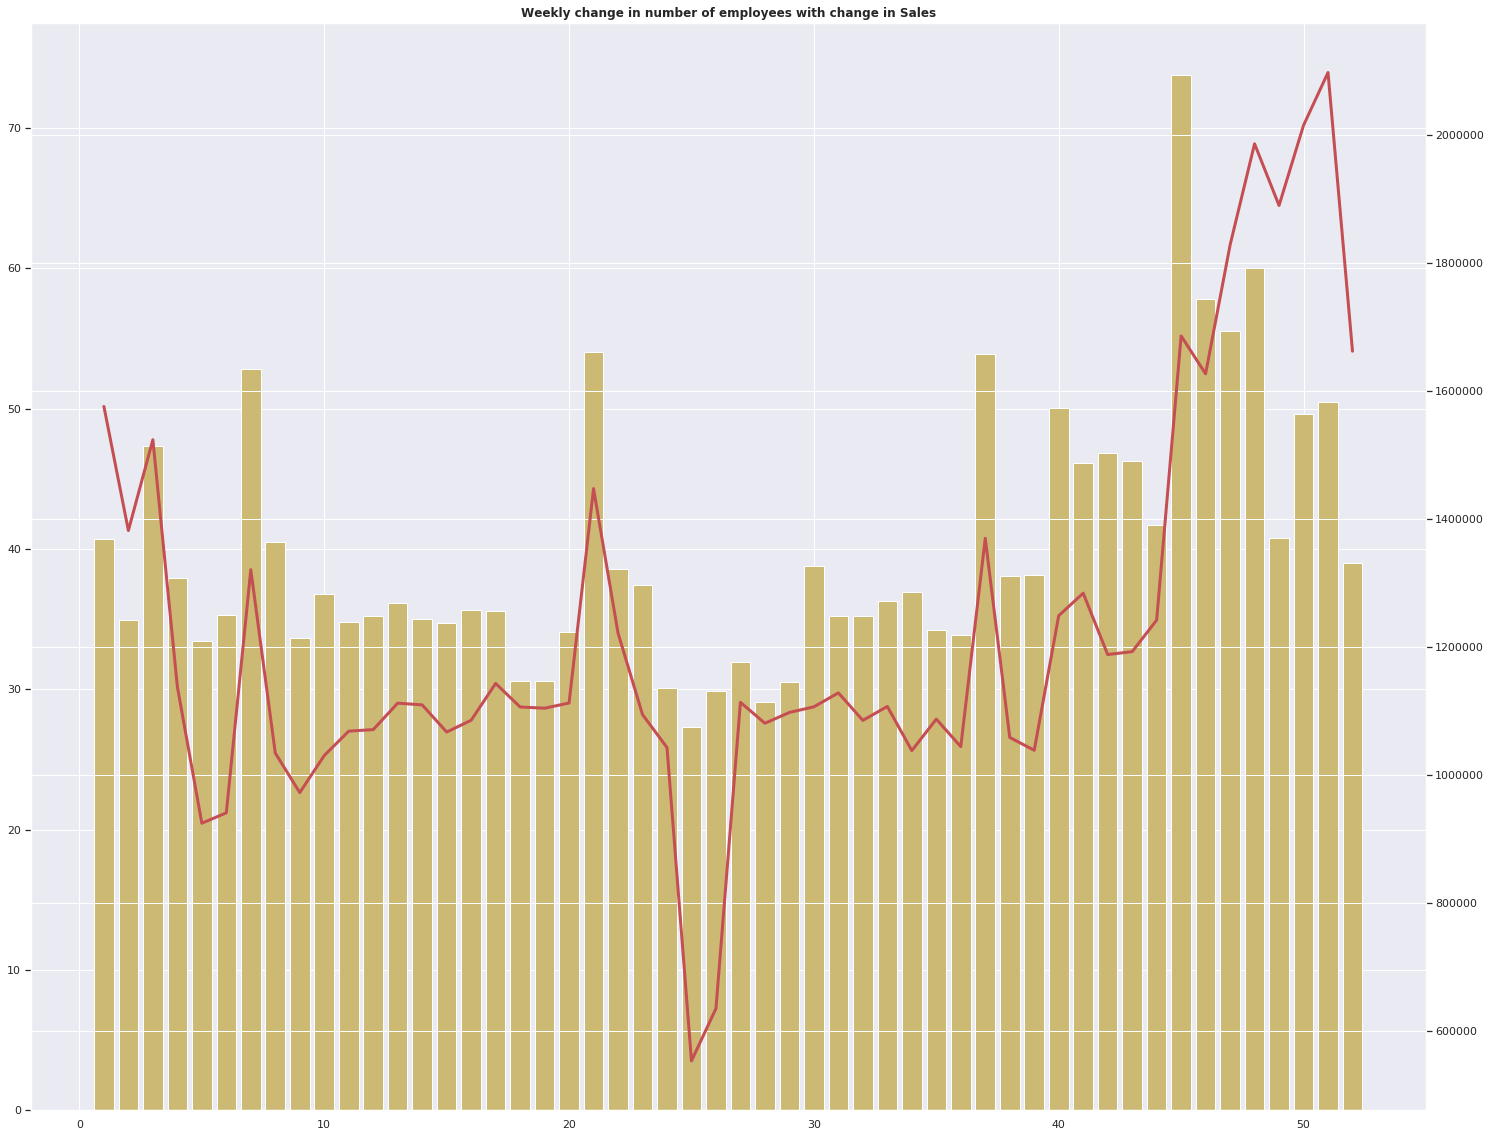

In [85]:
f = plt.figure()

ax1 = f.add_subplot(111)
ax1.bar(emp_savannah["week"], emp_savannah["avg_num_employes"], color='y', label="Average number of employees in the week")

ax2 = ax1.twinx()
ax2.plot(sales_savannah["week"],sales_savannah['count'], color="r", linewidth=3.0, label="Sum of sales")

plt.title("Weekly change in number of employees with change in Sales", fontweight="bold")
plt.show()

<BarContainer object of 52 artists>

Text(0.5, 1.0, 'Weekly change in number of employees with change in Sales')

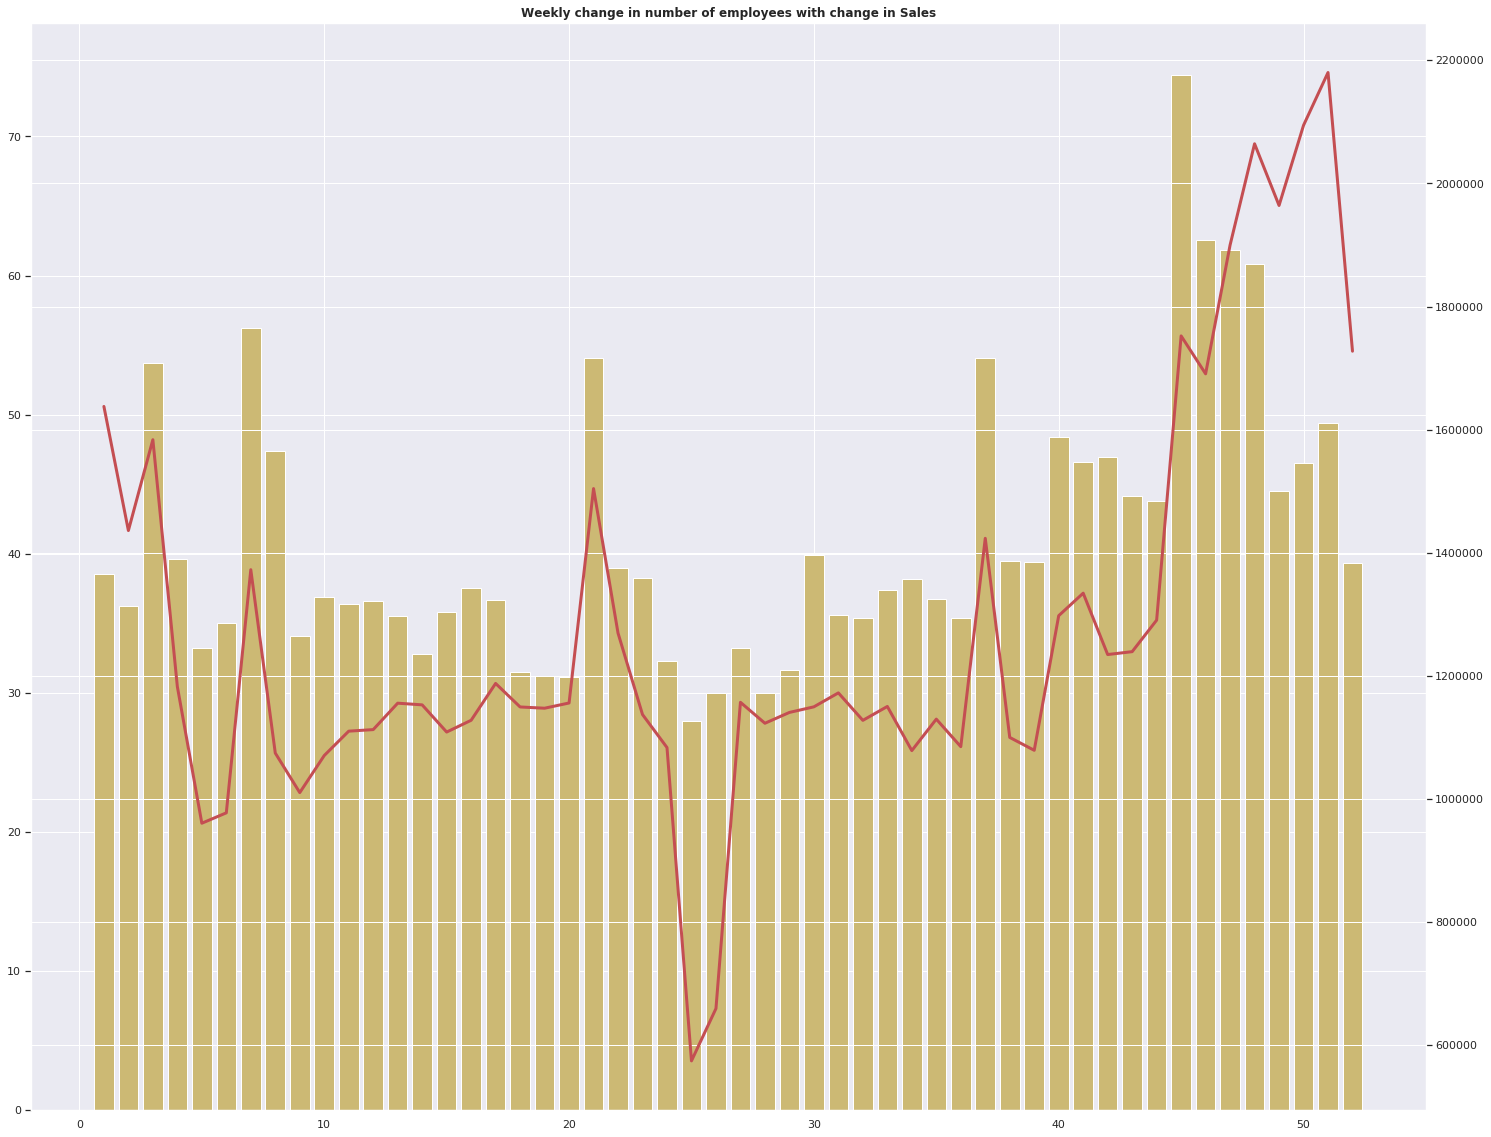

In [86]:
f = plt.figure()

ax1 = f.add_subplot(111)
ax1.bar(emp_louisville["week"], emp_louisville["avg_num_employes"], color='y', label="Average number of employees in the week")

ax2 = ax1.twinx()
ax2.plot(sales_louisville["week"],sales_louisville['count'], color="r", linewidth=3.0, label="Sum of sales")

plt.title("Weekly change in number of employees with change in Sales", fontweight="bold")
plt.show()

<BarContainer object of 52 artists>

Text(0.5, 1.0, 'Weekly change in number of employees with change in Sales')

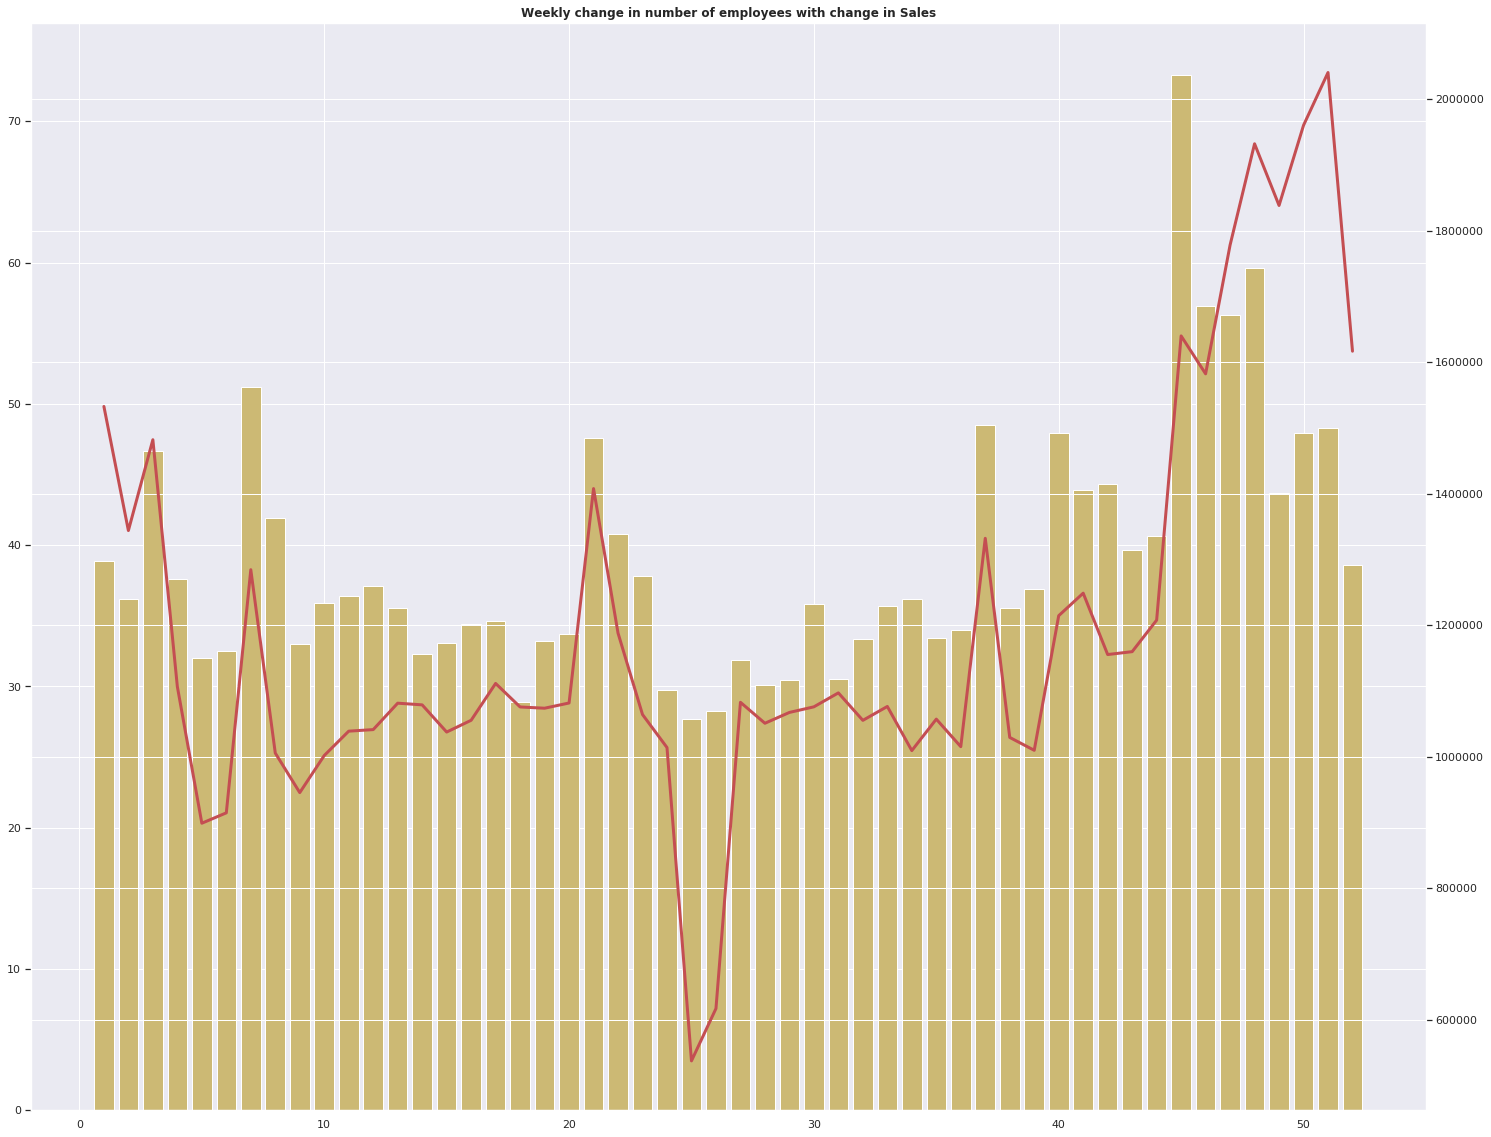

In [87]:
f = plt.figure()

ax1 = f.add_subplot(111)
ax1.bar(emp_lancaster["week"], emp_lancaster["avg_num_employes"], color='y', label="Average number of employees in the week")

ax2 = ax1.twinx()
ax2.plot(sales_lancaster["week"],sales_lancaster['count'], color="r", linewidth=3.0, label="Sum of sales")

plt.title("Weekly change in number of employees with change in Sales", fontweight="bold")
plt.show()

__We have very similar trends for the three places. There is a huge drop in the number of employees around the 25th week (June 18, 2012)? Why?__

__Destination events at certain store locations__

In [96]:
foo = data[['Store','DestinationEvent']].groupby('Store').agg({'DestinationEvent': 'nunique'})
foo

# every store has some destination event at some time

,DestinationEvent
Store,
Baltimore,2
Columbus,2
Detroit,2
Lancaster,2
Louisville,2
Philadelphia,2
Portland,2
Richmond,2
San Antonio,2


In [98]:
#baltimore - select the weeks where destination event is true
data_baltimore_destination_event = data[(data.Store == "Baltimore") & (data.DestinationEvent == "Yes")]
print(data_baltimore_destination_event.week.unique())

# Are the sales in these weeks significantly above??

array([37, 40, 41, 45, 46,  3,  4,  7,  8, 21, 22, 42])